import necessary libraries

In [1]:
from pylab import *
from numpy import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from random import randrange, random
import matplotlib.ticker as ticker

In [3]:
from celluloid import Camera # importando a camera
import seaborn as sns
import warnings
from IPython.display import HTML # para mostrar o vídeo no jupyter

### Problem 1 - dice game

Alternative **a)** two random numbers

In [4]:
a = randrange(1, 7)
b = randrange(1, 7)

print(a, b)

4 2


Alternative **b)** proportion of 6-6 dices simultaneously

In [6]:
N = 1000000

count = 0

for i in range(N):
  x = randrange(1, 7)
  y = randrange(1, 7)

  if x == 6 and y == 6:
    count += 1

print(count/N)
print(1/36)

0.028301
0.027777777777777776


### Problem 2 - radioactive decay chain

exemple 10.1 Newman

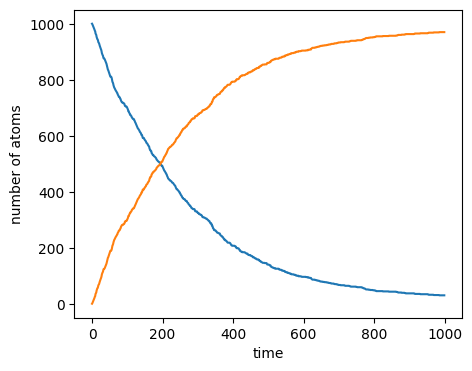

In [474]:
NTl = 1000
NPb = 0

tau = 3.053*60
h = 1.0
p = 1 - 2**(-h/tau)
tmax = 1000

tpoints = arange(0, tmax, h)
Tlpoints = []
Pbpoints = []

for t in tpoints:
    Tlpoints.append(NTl)
    Pbpoints.append(NPb)

    decay = 0
    for i in range(NTl):
        if random()<p:
            decay += 1
    NTl -= decay
    NPb += decay

figure(figsize=(5,4))
plot(tpoints, Tlpoints)
plot(tpoints, Pbpoints)
xlabel('time')
ylabel('number of atoms')
show()

**All Alternatives** - calculate the decay from $^{213}Bi$ to $^{209}Bi$

In [300]:
def probability(tau):
    return 1 - 2**(-1/tau)

In [478]:
tau_Bi213 = 46*60
tau_Tl = 2.2*60
tau_Pb = 3.3*60

h = 1.0

tmax = 20000
tpoints = arange(0, tmax, h)

Nbi213 = 20000
NPb = 0
NTl = 0
NBi = 0

Bi213points = []
Bipoints = []
Tlpoints = []
Pbpoints = []

for t in tpoints:
    Bi213points.append(Nbi213)
    Pbpoints.append(NPb)
    Tlpoints.append(NTl)
    Bipoints.append(NBi)

                            # alternative c)
    bi213_pb, bi213_tl = 0, 0
    for i in range(Nbi213):
        if random()<probability(2760):
            if random()<0.9791:
                bi213_pb += 1
            else:
                bi213_tl += 1
    Nbi213 -= bi213_pb
    NPb += bi213_pb

    Nbi213 -= bi213_tl
    NTl += bi213_tl

                            # alternative b)
    tl_pb = 0
    for j in range(NTl):
        if random()<probability(132):
            tl_pb += 1
    NTl -= tl_pb
    NPb += tl_pb

                            # alternative a)
    pb_bi = 0
    for k in range(NPb):
        if random()<probability(198):
            pb_bi += 1
    NPb -= pb_bi
    NBi += pb_bi

Final results after t = 20000

NBi213 = 119, NPb = 8, NTl = 0, NBi = 19873


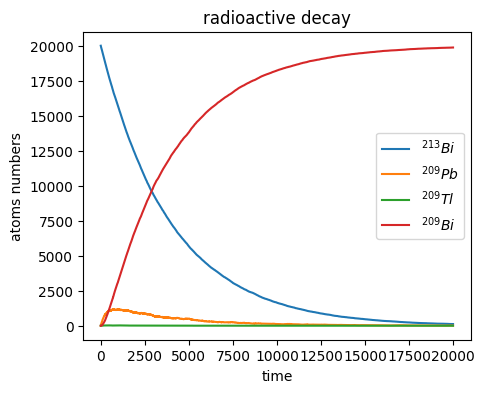

In [487]:
figure(figsize=(5,4))
plot(tpoints, Bi213points, label=r"$^{213}Bi$")
plot(tpoints, Pbpoints, label=r"$^{209}Pb$")
plot(tpoints, Tlpoints, label=r"$^{209}Tl$")
plot(tpoints, Bipoints, label=r"$^{209}Bi$")
title("radioactive decay")
xlabel("time")
ylabel("atoms numbers")
legend()
print(f'Final results after t = {tmax}\n')
print(f'NBi213 = {Nbi213}, NPb = {NPb}, NTl = {NTl}, NBi = {NBi}')

### Problem 3 - random path

In [382]:
def celluloid(xaxis, yaxis, xlim, ylim, title, ylabel, xlabel, interval, type):
    
    fig, ax = plt.subplots(figsize=(5, 3)) # criando minha fig    
    camera = Camera(fig)# a camera recebe a figura que vamos usar

    if type == 'curve':
        for i in range(len(xaxis)):
            ax.set_title(f'{title}')
            ax.set_xlim(-xlim, xlim)
            ax.set_ylim(-ylim, ylim)
            ax.grid()
    
            new_xaxis = xaxis[:i]
            new_yaxis = yaxis[:i]
    
            ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
            ax.ticklabel_format(style='sci', axis='y', scilimits=(3, 3))
            
            ax.set_xlabel(xlabel)
            ax.set_ylabel(ylabel)
            
            ax.plot(new_xaxis, new_yaxis, c='tab:blue')
            plt.tight_layout()  # Ajusta o layout para evitar cortes
            camera.snap() # tirar foto da fig

    elif type == 'hist':
        
        bins = np.arange(10, 101, 5)
        
        for bin in bins:
    
            # ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
            # ax.ticklabel_format(style='sci', axis='y', scilimits=(3, 3))

            ax.set_xlim(-xlim, xlim)
            ax.set_ylim(-ylim, ylim)
        
            ax.set_xlabel(xlabel)
            ax.set_ylabel(ylabel)

            sns.set_theme(style='darkgrid', palette='deep', font='Verdana', font_scale=1.0)

            sns.histplot(xaxis, bins=bin)
            sns.histplot(yaxis, bins=bin)
            
            # x_plot = sns.distplot(xaxis, color='red') 
            # y_plot = sns.distplot(yaxis, color='blue')

            # ax.hist(yaxis, bins=bin, label='y random values')

            plt.tight_layout()  # Ajusta o layout para evitar cortes
            camera.snap() # tirar foto da fig
    
    animation = camera.animate(interval=interval) # animação pronta!
    plt.close(fig)
    return HTML(animation.to_html5_video()) #mostrando a animação no notebook

In [679]:
L = 101
steps = 2000

x = arange(0, L-1, 1)
y = arange(0, L-1, 1)

xpos, ypos = len(x)/2, len(y)/2
xall_pos, yall_pos = [], []

for i in range(steps):
    rand = randrange(0, 4)

    if rand == 0 and xpos > 1:
        xpos -= 1
    elif rand == 1 and xpos < L-1:
        xpos += 1
    elif rand ==2 and ypos > 1:
        ypos -= 1
    elif rand == 3 and ypos < L-1:
        ypos += 1
        
    xall_pos.append(xpos)
    yall_pos.append(ypos)

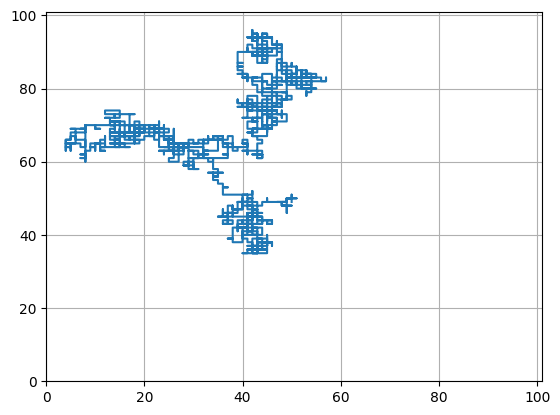

In [681]:
plot(xall_pos, yall_pos)
xlim(0, L)
ylim(0, L)
grid()

In [683]:
ax = (L-1)/2
half_xlim, half_ylim = ax, ax
celluloid(xall_pos, yall_pos, half_xlim, half_ylim, title='Brownian motion', xlabel='x_axis', ylabel='y_axis', interval=5, type='curve')

https://github.com/physerikc/computational-physics-II/blob/main/videos/brownian%20motion.mp4

### Problem 4 - random numbers

our function is

$$ p(x) = \mu e^{-\mu x}, $$

using the integral $\int_{-\infty}^{x(z)} p(x')dx' = \int_{0}^{z} dz' = z$, we have

$$ \mu \int_{0}^{x(z)} e^{-\mu x'}dx' = 1 - e^{-\mu x} = z, $$

$$ x = -\frac{1}{\mu} ln(1-z). $$

now we can see the values of z from zero to 1 and obtain our exponentially distributed x values.

Alternative **a)** first function

In [429]:
N = 10000
xs = []

for i in range(N):
    x = random()
    xs.append(-np.log(1-x))    

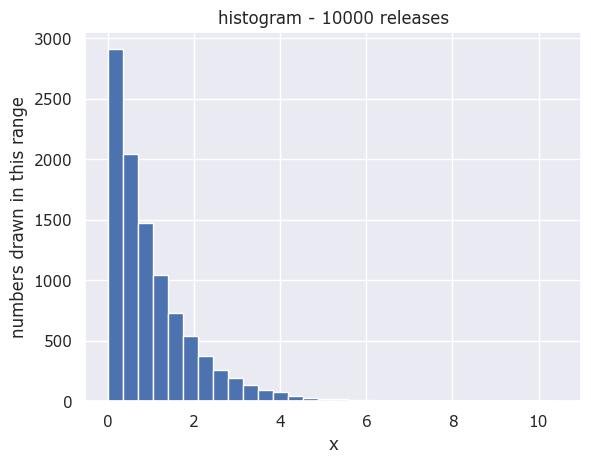

In [431]:
hist(xs, bins=30)
title('histogram - 10000 releases')
ylabel('numbers drawn in this range')
xlabel('x')
show()

Alternative **b)** second function

we can't calculate the integral of function $exp(-x^{2}/2\sigma^{2})$, so we'll use the trick from pg460 Newman (considering $\sigma=1$),

make $x=rcos(\theta)$ and $y=rcos(\theta)$, we can modify the coordinates and get

$$ \frac{1}{\sigma^{2}} \int_{0}^{r} exp(-r^{2}/2\sigma^{2}) r dr = 1-exp(-r^{2}/2\sigma^{2}) = z, $$

$$ r = \sqrt{-2\sigma ln(1-z)}. $$

so we need take a **random() value to z, find r and calculate (x, y) using other random() value for $\theta$**, i.e.,

In [425]:
N = 10000
xs2, ys2 = [], []

for i in range(N):
    
    z = random()
    r = (1/(2*np.pi))*np.sqrt(-2*np.log(1-z))
    theta = 2*pi*random()

    x, y = r*np.cos(theta), r*np.sin(theta)

    xs2.append(x)
    ys2.append(y)

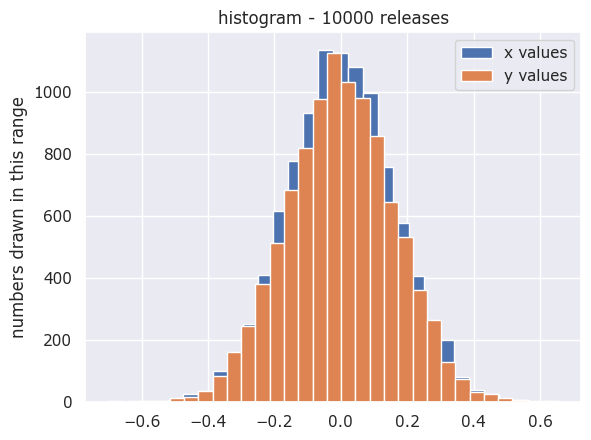

In [427]:
hist(xs2, bins=30, label='x values')
hist(ys2, bins=30, label='y values')
title('histogram - 10000 releases')
ylabel('numbers drawn in this range')
legend()
show()

### Problem 5 - integral and errors

Alternative **a)** calculate the integral value using random points **(Monte Carlo method)**

In [38]:
def func(x):
    if x != 0 and x != 2:
        return sin(1/(x*(2-x)))**2
    else:
        return 0

In [16]:
N = 10000
count = 0

for i in range(N):
    x = 2*random()
    y = random()
    
    if y < func(x):
        count += 1
I = 2*count/N
print(f'I value = {I}')

I value = 1.4454


In [18]:
error = sqrt(I*(2-I))/sqrt(N)
print(f'error = {error}')

error = 0.008953316927262207


Alternative **b)** calculate the integral value using **mean value from f**

In [52]:
a, b = 0, 2
N = 10000

nums = linspace(a, b, N)

sum = 0
for xi in nums:
    sum += func(xi)

Ib = (b-a)*sum/N
print(f'I value = {Ib}')

I value = 1.4513011223488317


In [60]:
numsb = linspace(a, b, N)

sumf, sumf2 = 0, 0

for xi in numsb:
    sumf += func(xi)
    sumf2 += func(xi)**2

f, f2 = sumf/N, sumf2/N
varf = f2 - f**2

errorb = (b-a)*sqrt(varf/N)
print(f'errorb = {errorb}')

errorb = 0.005275789736086425


These calculations show us that the **errorb < error**, so this method using the **mean value is a little better than the Monte carlo method**